<a href="https://colab.research.google.com/github/Pataweepr/applyML_vistec_2019/blob/master/hw3_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Titanic

พวกเราจะพยายามให้ logictic reg เพื่อทำนาย แบบจำลอง

[kaggle](https://www.kaggle.com/c/titanic)

[linear_model](https://scikit-learn.org/stable/modules/linear_model.html)

[confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [0]:
# import library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
from google.colab import files
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from IPython.display import display

# load data from kaggle 
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url) #training set
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url) #test set


In [2]:
for col in train.columns:
  print(col , ': ',train[col].isnull().values.any())
print('--------------------------')
for col in test.columns:
  print(col , ': ',test[col].isnull().values.any())

PassengerId :  False
Survived :  False
Pclass :  False
Name :  False
Sex :  False
Age :  True
SibSp :  False
Parch :  False
Ticket :  False
Fare :  False
Cabin :  True
Embarked :  True
--------------------------
PassengerId :  False
Pclass :  False
Name :  False
Sex :  False
Age :  True
SibSp :  False
Parch :  False
Ticket :  False
Fare :  True
Cabin :  True
Embarked :  False


In [0]:
################################################################################
# TODO#1:                                                                      #
# clean your data
################################################################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
train["Age"] = train["Age"].fillna(train["Age"].mode().iloc[0])
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode().iloc[0])

train.loc[train["Embarked"] == "S", "Embarked"] = 0
train.loc[train["Embarked"] == "C", "Embarked"] = 1
train.loc[train["Embarked"] == "Q", "Embarked"] = 2

train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode().iloc[0])

train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1


In [0]:
test["Age"] = test["Age"].fillna(train["Age"].mode().iloc[0])
test["Fare"] = test["Fare"].fillna(train["Fare"].mode().iloc[0])

test.loc[test["Embarked"] == "S", "Embarked"] = 0
test.loc[test["Embarked"] == "C", "Embarked"] = 1
test.loc[test["Embarked"] == "Q", "Embarked"] = 2

test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1

data_test = np.array(test[["Pclass","Sex","Age","Embarked"]].values)

train test split

In [0]:
train = train.iloc[np.random.permutation(len(train))]
val = train.iloc[np.arange(800,len(train))].copy().reset_index(drop=True)
train = train.iloc[np.arange(800)].copy().reset_index(drop=True)



data_train = np.array(train[["Pclass","Sex","Age","Embarked"]].values)
y_train = np.array(train["Survived"].values, dtype = int)

data_val = np.array(val[["Pclass","Sex","Age","Embarked"]].values)
y_val = np.array(val["Survived"].values, dtype = int)

In [0]:
#display(val.head())
#display(train.head())

In [0]:
# normalize
def normalizer(x):
  x_nor_zer = preprocessing.StandardScaler().fit(x.reshape((x.shape[0],1)))
  return x_nor_zer;

In [0]:
################################################################################
# TODO#2: using scikit learn creat Logistic regression model 
# and fit it with data_train
################################################################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
clf = LogisticRegression(random_state=10, solver='lbfgs').fit(data_train, y_train)
y_pred_train = clf.predict(data_train)
y_pred_val = clf.predict(data_val)
y_pred = clf.predict(data_test)

In [9]:
clf.coef_

array([[-1.23672997,  2.58489528, -0.03658988,  0.29504941]])

In [0]:
def evaluate(yPred,yTrue):
  acc = accuracy_score(yTrue,yPred)
  f1 = f1_score(yTrue,yPred)
  precision = precision_score(yTrue,yPred)
  recall = recall_score(yTrue,yPred)
  print('accuracy : ',acc)
  print('f1 : ',f1)
  print('precision : ',precision)
  print('recall : ',recall)
  return acc,f1,precision,recall

In [11]:
print('train set')
acc_train,f1_train,precision_train,recall_train = evaluate(y_pred_train,y_train)
print('---------------------------------------------')
print('val set')
acc_val,f1_val,precision_val,recall_val = evaluate(y_pred_val,y_val)

train set
accuracy :  0.79625
f1 :  0.7260504201680673
precision :  0.7372013651877133
recall :  0.7152317880794702
---------------------------------------------
val set
accuracy :  0.6593406593406593
f1 :  0.6075949367088608
precision :  0.6153846153846154
recall :  0.6


[logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [0]:
# ดูค่า precision recall ที่หาได้
################################################################################
# TODO#3: using scikit learn creat Logistic regression model 
# and fit it with data_train
################################################################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################

## submit your result

In [0]:
################################################################################
# TODO#4:                                                                      #
# using the model with your test set
################################################################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################


In [0]:
################################################################################
# TODO#5:  Submit a screenshot of your submission (with the scores)
# Warning! check your format before submit to kaggle
# example data type
################################################################################


## select feature
 What happens if you reduce the amount of features to just Sex and Age? (Use logistic regression)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,805,1,3,"Hedman, Mr. Oskar Arvid",0,27.0,0,0,347089,6.975,NaN,0
1,226,0,3,"Berglund, Mr. Karl Ivar Sven",0,22.0,0,0,PP 4348,9.350,NaN,0
2,271,0,1,"Cairns, Mr. Alexander",0,24.0,0,0,113798,31.000,NaN,0
3,377,1,3,"Landergren, Miss. Aurora Adelia",1,22.0,0,0,C 7077,7.250,NaN,0
4,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",1,36.0,1,2,113760,120.000,B96 B98,0


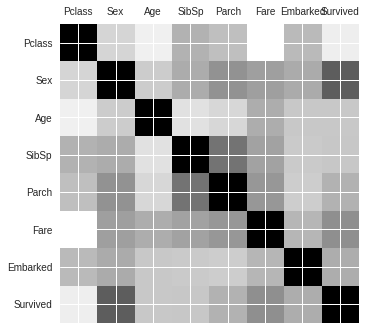

In [14]:
display(train.head())
classes = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']

data_train = np.array(train[classes].values)
data_val = np.array(val[classes].values)

data_to_sel_feature = np.vstack((data_train,data_val))
#display(data_train_sel)

#display(np.corrcoef(data_train_sel.T))
fig, ax = plt.subplots()

corre_mat = np.corrcoef(data_to_sel_feature.T)
ax.matshow(corre_mat)
ax.set(xticklabels = ['0']+classes,yticklabels = ['0']+classes)

plt.show()

In [38]:
################################################################################
# TODO#7: RE-do with linear regression model                                                                   #
################################################################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
data_train_low = np.array(train[["Sex","Fare",'Age']].values)
data_val_low = np.array(val[["Sex","Fare",'Age']].values)
#data_test_low = np.array(test[["Sex","Fare"]].values)


clf = LogisticRegression(random_state=10, solver='lbfgs',max_iter = 1000).fit(data_train_low, y_train)
y_pred_train = clf.predict(data_train_low)
y_pred_val = clf.predict(data_val_low)
#y_pred_test = clf.predict(data_test_low)

print('train set')
acc_train,f1_train,precision_train,recall_train = evaluate(y_pred_train,y_train)
print('---------------------------------------------')
print('val set')
acc_val,f1_val,precision_val,recall_val = evaluate(y_pred_val,y_val)




train set
accuracy :  0.7925
f1 :  0.7195945945945947
precision :  0.7344827586206897
recall :  0.7052980132450332
---------------------------------------------
val set
accuracy :  0.6923076923076923
f1 :  0.631578947368421
precision :  0.6666666666666666
recall :  0.6


## created complex feature

Try adding some higher order features to your training (x2 1,x1x2,...). 

[polynomial feature](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [39]:
################################################################################
# TODO#8: RE-do with linear regression model                                                                   #
################################################################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
data_trian_new = preprocessing.PolynomialFeatures(2).fit_transform(data_train)
data_val_new = preprocessing.PolynomialFeatures(2).fit_transform(data_val)
data_test_new = preprocessing.PolynomialFeatures(2).fit_transform(data_test)


clf = LogisticRegression(random_state=10, solver='lbfgs',max_iter = 1000).fit(data_trian_new, y_train)
y_pred_train =clf.predict(data_trian_new)
y_pred = clf.predict(data_val_new)


print('train set')
acc_train,f1_train,precision_train,recall_train = evaluate(y_pred_train,y_train)
print('---------------------------------------------')
print('val set')
acc_val,f1_val,precision_val,recall_val = evaluate(y_pred_val,y_val)

train set
accuracy :  0.8275
f1 :  0.7561837455830389
precision :  0.8106060606060606
recall :  0.7086092715231788
---------------------------------------------
val set
accuracy :  0.6923076923076923
f1 :  0.631578947368421
precision :  0.6666666666666666
recall :  0.6


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


#Lasso

In [36]:
classes = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

data_train = np.array(train[classes].values)
data_val = np.array(val[classes].values)
reg_coef = 8
clf = LogisticRegression(random_state=10,C=1/reg_coef, solver='lbfgs',max_iter = 1000).fit(data_train, y_train)
y_pred_train = clf.predict(data_train)
y_pred_val = clf.predict(data_val)
#y_pred_test = clf.predict(data_test_low)

print('train set')
acc_train,f1_train,precision_train,recall_train = evaluate(y_pred_train,y_train)
print('---------------------------------------------')
print('val set')
acc_val,f1_val,precision_val,recall_val = evaluate(y_pred_val,y_val)

train set
accuracy :  0.81375
f1 :  0.7426597582037996
precision :  0.776173285198556
recall :  0.7119205298013245
---------------------------------------------
val set
accuracy :  0.7032967032967034
f1 :  0.6493506493506493
precision :  0.6756756756756757
recall :  0.625


[bar chart](https://pythonspot.com/matplotlib-bar-chart/)

[linear_model](https://scikit-learn.org/stable/modules/linear_model.html)

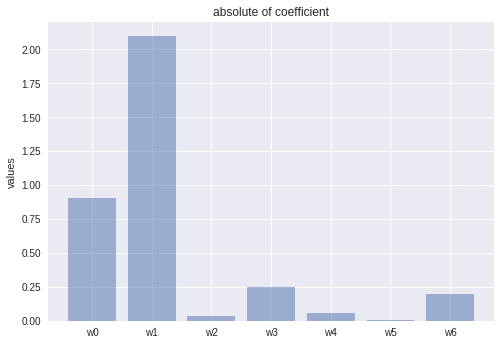

In [37]:
coeff_np = np.array(clf.coef_).reshape(len(classes))
ind = np.arange(coeff_np.shape[0])

objects = ('w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6')
plt.bar(ind, np.absolute(coeff_np), align='center', alpha=0.5)
plt.xticks(ind, objects)
plt.ylabel('values')
plt.title('absolute of coefficient')
 
plt.show()

In [34]:
data_train = np.array(train[classes].values)
data_val = np.array(val[classes].values)
reg_coef = 8
clf_lasso = LogisticRegression(penalty = 'l1',C = 1/reg_coef,random_state=10, solver='liblinear',max_iter = 1000).fit(data_train, y_train)
y_pred_train = clf_lasso.predict(data_train)
y_pred_val = clf_lasso.predict(data_val)
#y_pred_test = clf.predict(data_test_low)

print('train set')
acc_train,f1_train,precision_train,recall_train = evaluate(y_pred_train,y_train)
print('---------------------------------------------')
print('val set')
acc_val,f1_val,precision_val,recall_val = evaluate(y_pred_val,y_val)

train set
accuracy :  0.8
f1 :  0.726027397260274
precision :  0.75177304964539
recall :  0.7019867549668874
---------------------------------------------
val set
accuracy :  0.7252747252747253
f1 :  0.6478873239436619
precision :  0.7419354838709677
recall :  0.575


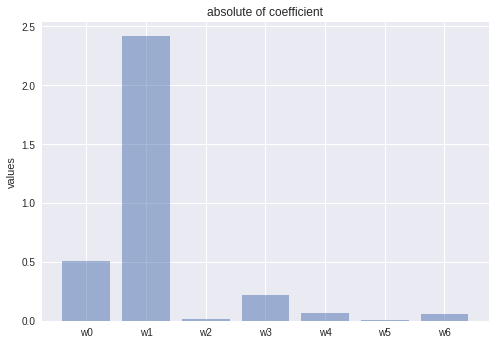

In [35]:
coeff_np = np.array(clf_lasso.coef_).reshape(len(classes))
ind = np.arange(coeff_np.shape[0])

objects = ('w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6')
plt.bar(ind, np.absolute(coeff_np), align='center', alpha=0.5)
plt.xticks(ind, objects)
plt.ylabel('values')
plt.title('absolute of coefficient')
 
plt.show()